#Problem 1

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome        

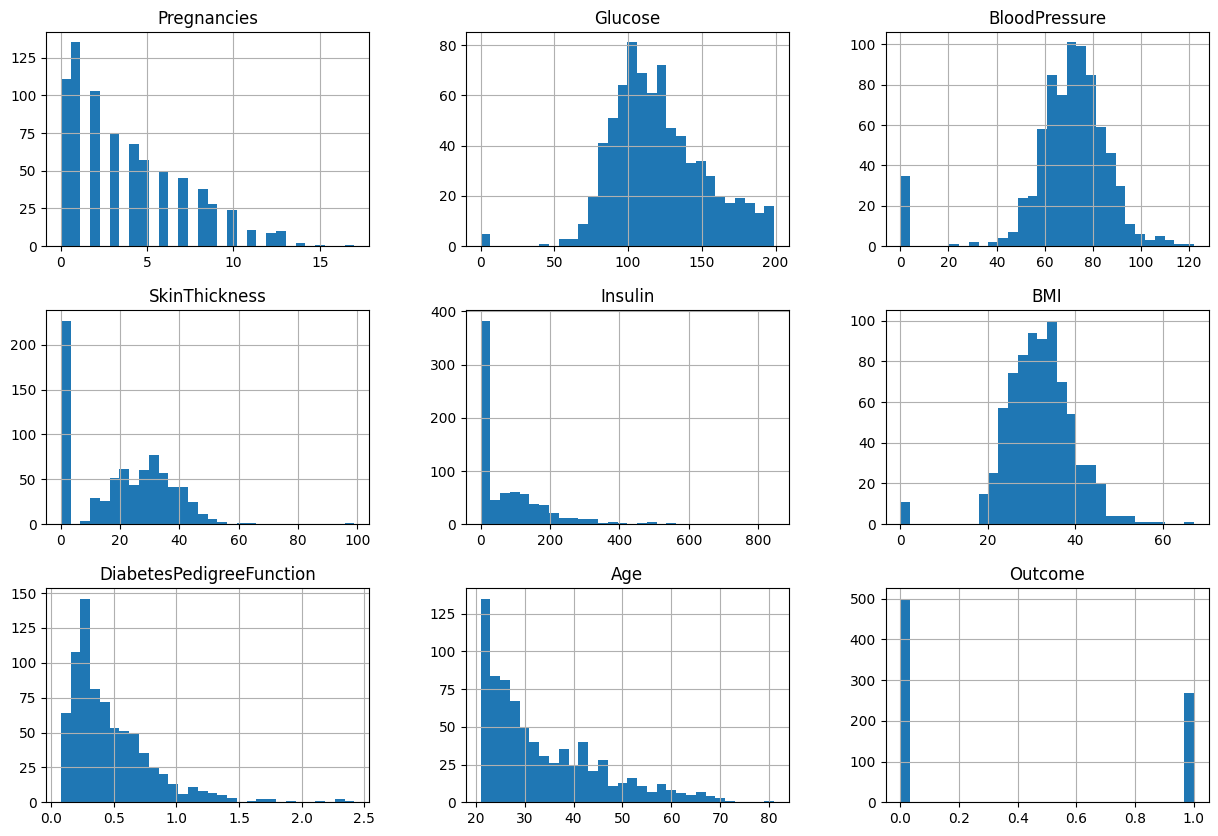

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv('diabetes.csv')  # Replace with the correct path to your CSV file

# Display the first few rows of the dataset
print(data.head())

# Check the data types of each column
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

print(data.describe())
data.hist(bins=30, figsize=(15, 10))
plt.show()



In [2]:
from sklearn.model_selection import train_test_split

# Separate the feature matrix (X) and target variable (y)
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Perform a train-test split using Scikit-learn (70%-30% ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Training set (X_train):", X_train.shape)
print("Test set (X_test):", X_test.shape)
print("Training target (y_train):", y_train.shape)
print("Test target (y_test):", y_test.shape)


Training set (X_train): (537, 8)
Test set (X_test): (231, 8)
Training target (y_train): (537,)
Test target (y_test): (231,)


In [3]:
import numpy as np

# Function to compute Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to predict the class for a single query
def predict_single(x_train, y_train, query, k=3):
    distances = []

    # Compute distance from the query to all points in the training set
    for i in range(len(x_train)):
        dist = euclidean_distance(x_train[i], query)
        distances.append((dist, y_train[i]))

    # Sort by distance and get the top k nearest neighbors
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    # Extract the classes of the neighbors
    classes = [neighbor[1] for neighbor in neighbors]

    # Return the majority class
    return max(set(classes), key=classes.count)

# Function to predict classes for all test samples
def predict_all(x_train, y_train, x_test, k=3):
    predictions = []
    for query in x_test:
        prediction = predict_single(x_train, y_train, query, k)
        predictions.append(prediction)
    return np.array(predictions)

# Function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

# Convert the training and testing data to numpy arrays
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values
y_test_np = y_test.values

# Predict the classes for the test set
k = 3  # You can adjust the value of k
y_pred = predict_all(X_train_np, y_train_np, X_test_np, k)

# Calculate the accuracy
accuracy = calculate_accuracy(y_test_np, y_pred)

print(f"Accuracy of KNN (k={k}): {accuracy:.2f}%")


Accuracy of KNN (k=3): 67.53%


#Problem 2

In [ ]:
# Function to standardize (z-score normalization) the feature matrix
def standardize_features(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

# Standardize the training and testing feature matrices
X_train_scaled = standardize_features(X_train_np)
X_test_scaled = standardize_features(X_test_np)

# Repeat the KNN classification using the scaled data
y_pred_scaled = predict_all(X_train_scaled, y_train_np, X_test_scaled, k)

# Calculate the accuracy using the scaled data
accuracy_scaled = calculate_accuracy(y_test_np, y_pred_scaled)

print(f"Accuracy of KNN with scaled features (k={k}): {accuracy_scaled:.2f}%")


Accuracy of KNN with scaled features (k=3): 71.00%


In [ ]:
# Display the results
print(f"Accuracy of KNN on Original Dataset (k={k}): {accuracy:.2f}%")
print(f"Accuracy of KNN on Scaled Dataset (k={k}): {accuracy_scaled:.2f}%")

# Compare the two accuracies
if accuracy_scaled > accuracy:
    print("Scaling improved the KNN model's accuracy.")
elif accuracy_scaled < accuracy:
    print("Scaling reduced the KNN model's accuracy.")
else:
    print("Scaling did not impact the KNN model's accuracy.")


Accuracy of KNN on Original Dataset (k=3): 67.53%
Accuracy of KNN on Scaled Dataset (k=3): 71.00%
Scaling improved the KNN model's accuracy.


Problem 3

In [ ]:
import time

# Function to record accuracy and time for a range of k values
def experiment_with_k(X_train, y_train, X_test, y_test, k_values):
    results = []

    for k in k_values:
        start_time = time.time()  # Record start time

        # Predict classes for the test set
        y_pred = predict_all(X_train, y_train, X_test, k)

        end_time = time.time()  # Record end time

        # Calculate accuracy
        accuracy = calculate_accuracy(y_test, y_pred)

        # Record time taken and accuracy
        results.append({"k": k, "accuracy": accuracy, "time_taken": end_time - start_time})

    return results

# Define the range of k values
k_values = list(range(1, 16))

# Experiment on the original dataset
results_original = experiment_with_k(X_train_np, y_train_np, X_test_np, y_test_np, k_values)

# Experiment on the scaled dataset
results_scaled = experiment_with_k(X_train_scaled, y_train_np, X_test_scaled, y_test_np, k_values)

# Display results
import pandas as pd

df_original = pd.DataFrame(results_original)
df_scaled = pd.DataFrame(results_scaled)

print("Results for Original Dataset:")
print(df_original)

print("\nResults for Scaled Dataset:")
print(df_scaled)


Results for Original Dataset:
     k   accuracy  time_taken
0    1  68.831169    0.945528
1    2  72.727273    0.902636
2    3  67.532468    0.911586
3    4  72.294372    0.881873
4    5  68.831169    0.920550
5    6  70.129870    0.932343
6    7  69.264069    1.159291
7    8  71.428571    1.385924
8    9  70.129870    1.644708
9   10  71.861472    1.256630
10  11  73.160173    0.930201
11  12  74.025974    0.937598
12  13  74.458874    0.930315
13  14  72.727273    0.904834
14  15  74.025974    0.923945

Results for Scaled Dataset:
     k   accuracy  time_taken
0    1  62.770563    0.898658
1    2  68.398268    0.907074
2    3  70.995671    0.899248
3    4  70.129870    0.947452
4    5  71.861472    0.911577
5    6  70.129870    1.500564
6    7  70.562771    1.622207
7    8  70.129870    1.207980
8    9  70.995671    0.903972
9   10  70.562771    0.957814
10  11  71.428571    0.931236
11  12  70.562771    0.962196
12  13  71.428571    0.948911
13  14  70.995671    0.942955
14  15  72.

#problem 3

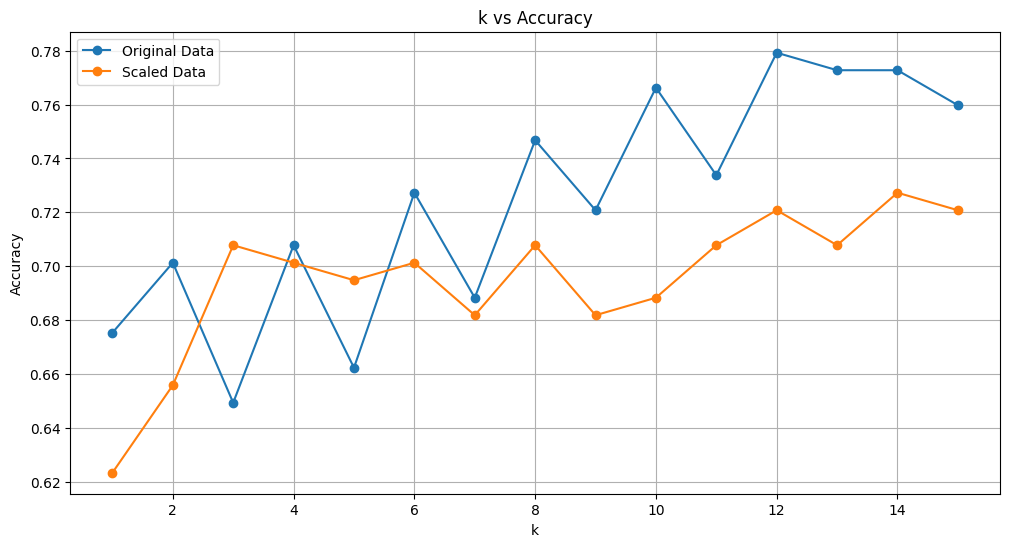

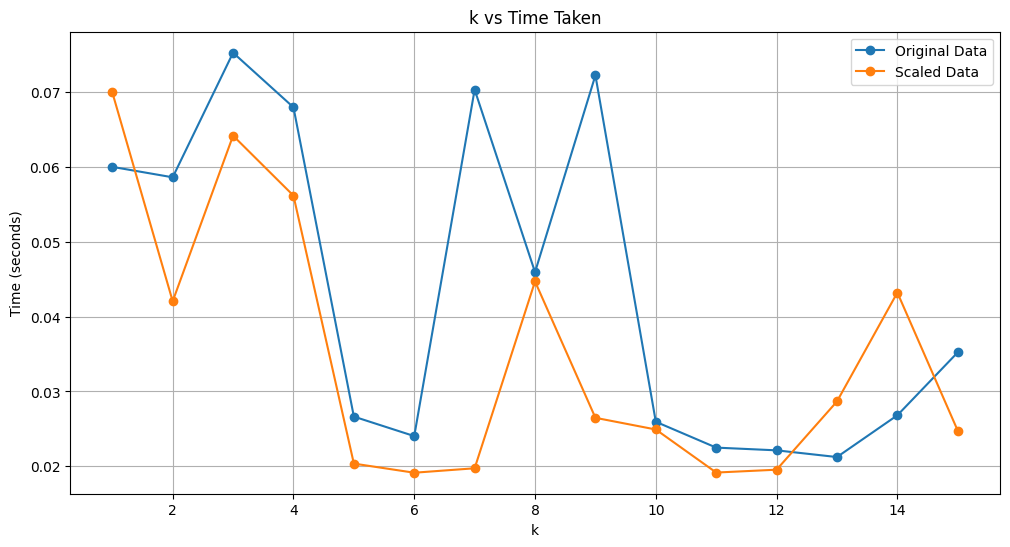

Optimal k for original dataset: 12
Optimal k for scaled dataset: 14


In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')  # Replace with your dataset path

# Separate features and target
X = data.drop(columns='Outcome')  # Assuming 'Outcome' is the target column
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize variables for storing results
results_original = []
results_scaled = []

# Scale the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Test for k = 1 to 15
for k in range(1, 16):
    # Original dataset
    knn_original = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn_original.fit(X_train, y_train)
    predictions = knn_original.predict(X_test)
    time_taken = time.time() - start_time
    accuracy = accuracy_score(y_test, predictions)
    results_original.append((k, accuracy, time_taken))

    # Scaled dataset
    knn_scaled = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn_scaled.fit(X_train_scaled, y_train)
    predictions = knn_scaled.predict(X_test_scaled)
    time_taken = time.time() - start_time
    accuracy = accuracy_score(y_test, predictions)
    results_scaled.append((k, accuracy, time_taken))

# Convert results to DataFrame
results_original_df = pd.DataFrame(results_original, columns=['k', 'Accuracy', 'Time'])
results_scaled_df = pd.DataFrame(results_scaled, columns=['k', 'Accuracy', 'Time'])

# Plot Accuracy vs k
plt.figure(figsize=(12, 6))
plt.plot(results_original_df['k'], results_original_df['Accuracy'], label='Original Data', marker='o')
plt.plot(results_scaled_df['k'], results_scaled_df['Accuracy'], label='Scaled Data', marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Time vs k
plt.figure(figsize=(12, 6))
plt.plot(results_original_df['k'], results_original_df['Time'], label='Original Data', marker='o')
plt.plot(results_scaled_df['k'], results_scaled_df['Time'], label='Scaled Data', marker='o')
plt.title('k vs Time Taken')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid()
plt.show()

# Analyze and Discuss
optimal_k_original = results_original_df.loc[results_original_df['Accuracy'].idxmax(), 'k']
optimal_k_scaled = results_scaled_df.loc[results_scaled_df['Accuracy'].idxmax(), 'k']
print(f"Optimal k for original dataset: {optimal_k_original}")
print(f"Optimal k for scaled dataset: {optimal_k_scaled}")
